# Regression Analysis of Apprentice Chef


In [1]:
#importing libraries needed data analysis
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
import statsmodels.formula.api as smf 


#setting print options of the chef dataset
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# reading chef file
file = 'Apprentice_Chef_Dataset.xlsx'
chef = pd.read_excel(io = file)

In [2]:
#begin cleaning the data, viewing for empty values 

#view the column names at the same time 
#summing missing values per column
chef.isnull().sum(axis = 0)

REVENUE                         0
CROSS_SELL_SUCCESS              0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    47
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
MOBILE_NUMBER                   0
CANCELLATIONS_BEFORE_NOON       0
CANCELLATIONS_AFTER_NOON        0
TASTES_AND_PREFERENCES          0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
EARLY_DELIVERIES                0
LATE_DELIVERIES                 0
PACKAGE_LOCKER                  0
REFRIGERATED_LOCKER             0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
MASTER_CLASSES_ATTENDED         0
MEDIAN_MEAL_RATING              0
AVG_CLICKS_PER_VISIT            0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

In [3]:
#initiatiating fill value
fill = "na"

#imputing 'FAMILY_NAME'
chef['FAMILY_NAME'] = chef['FAMILY_NAME'].fillna(fill)

#checking if values are still missing
chef.isnull().any(axis=0).any(axis=0)

#checking if there are 47 values imputed as na
(chef['FAMILY_NAME'] == "na").sum()

47

In [4]:
#Using describe function to determine what kind of variables are the columns we
#are looking at 
chef.describe()

,REVENUE,CROSS_SELL_SUCCESS,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,2107.292652,0.678828,74.634121,4.904933,6.983556,5.383864,99.604651,0.877698,1.404933,0.165982,0.714286,5.515930,1.476362,11.329908,1.486125,2.970709,0.355087,0.113052,150.556578,4.437307,0.604317,2.794964,13.508222,106.433710
std,1138.290709,0.467047,55.309782,2.502175,2.281193,3.044001,62.341756,0.327719,1.549677,0.432241,0.451870,0.580757,0.527600,13.573303,2.318599,2.744598,0.478663,0.316738,49.447180,1.549666,0.641866,0.756528,2.333876,181.014124
min,131.000000,0.000000,11.000000,1.000000,1.000000,1.000000,10.330000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.400000,1.000000,0.000000,1.000000,5.000000,0.000000
25%,1350.000000,0.000000,39.000000,3.000000,5.000000,3.000000,72.000000,1.000000,0.000000,0.000000,0.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,114.400000,3.000000,0.000000,2.000000,12.000000,0.000000
50%,1740.000000,1.000000,60.000000,5.000000,7.000000,5.000000,94.160000,1.000000,1.000000,0.000000,1.000000,6.000000,1.000000,7.000000,0.000000,2.000000,0.000000,0.000000,145.600000,4.000000,1.000000,3.000000,13.000000,0.000000
75%,2670.000000,1.000000,95.000000,7.000000,8.000000,8.000000,117.287500,1.000000,2.000000,0.000000,1.000000,6.000000,2.000000,13.000000,3.000000,4.000000,1.000000,0.000000,173.775000,5.000000,1.000000,3.000000,15.000000,174.000000
max,8793.750000,1.000000,493.000000,19.000000,18.000000,10.000000,1645.600000,1.000000,13.000000,3.000000,1.000000,7.000000,3.000000,52.000000,9.000000,19.000000,1.000000,1.000000,564.200000,11.000000,3.000000,5.000000,19.000000,1600.000000


In [5]:
####################################################

#Feature Engineering of the Categorical Data

####################################################

#running value counts on the variables seen as categorical
#analyzing whether some features need more engineering or not

print(f"""

Email
----------
{chef['EMAIL'].value_counts()}


First Name
-------------
{chef['FIRST_NAME'].value_counts()}


Last Name
----------
{chef['FAMILY_NAME'].value_counts()}

""")




Email
----------
varly@protonmail.com           1
robin.potter@protonmail.com    1
cheyk@yahoo.com                1
grigg@msn.com                  1
hugo.vance@protonmail.com      1
                              ..
damon.vypren@live.com          1
hother.umber@disney.com        1
elaena.targaryen@yahoo.com     1
malleon@msn.com                1
dhazzar@protonmail.com         1
Name: EMAIL, Length: 1946, dtype: int64


First Name
-------------
Jon        21
Jeyne      14
Aegon      12
Alyn       10
Walder     10
           ..
Jhiqui      1
Tion        1
Cassana     1
Utt         1
Armen       1
Name: FIRST_NAME, Length: 1442, dtype: int64


Last Name
----------
Frey         79
na           47
Stark        32
Lannister    29
Tyrell       28
             ..
Rus           1
Star-Eyes     1
Softfoot      1
Kegs          1
Rigney        1
Name: FAMILY_NAME, Length: 1071, dtype: int64




In [6]:
############################################

#Engineering Email Based on Domain

############################################

#import libraries
import random as rand

#random seed
rand.seed(a=372)

# STEP 1: splitting emails at the @ sign

# placeholder list
placeholder_lst = []

# looping each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '@'
    split_email = chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# convert to df 
email_df = pd.DataFrame(placeholder_lst)


# results
email_df

,0,1
0,saathos,unitedhealth.com
1,alysanne.osgrey,ge.org
2,edwyd.fossoway,jnj.com
3,eleyna.westerling,ge.org
4,elyn.norridge,jnj.com
...,...,...
1941,obara.sand,yahoo.com
1942,quentyn.blackwood,yahoo.com
1943,rhonda.rowan,gmail.com
1944,turnip,yahoo.com


In [7]:
# STEP 2:CONCATENATING DOMAINS AS A NEW COLUMN IN CHEF DF

# safety measure in case of multiple concatenations
chef = pd.read_excel(file)


# renaming column to concatenate
email_df.columns = ['0' , 'EMAIL_DOMAINS']


# concatenating email domains to chef
#adds the column to the dataset
chef = pd.concat([chef, email_df['EMAIL_DOMAINS']],
                   axis = 1)


# printing email domains
chef.loc[: ,'EMAIL_DOMAINS'].value_counts()

gmail.com           303
protonmail.com      284
yahoo.com           274
msn.com              72
aol.com              69
passport.com         64
hotmail.com          63
live.com             62
me.com               59
amex.com             30
jnj.com              28
merck.com            28
cocacola.com         28
mcdonalds.com        28
nike.com             27
apple.com            27
dupont.com           26
ibm.com              26
ge.org               26
chevron.com          25
microsoft.com        25
exxon.com            24
travelers.com        24
unitedhealth.com     24
boeing.com           23
mmm.com              22
caterpillar.com      22
verizon.com          22
pg.com               22
disney.com           21
walmart.com          21
visa.com             20
pfizer.com           20
jpmorgan.com         19
unitedtech.com       18
cisco.com            18
goldmansacs.com      18
intel.com            17
homedepot.com        17
Name: EMAIL_DOMAINS, dtype: int64

In [8]:
# STEP 3: splitting emails at the '.'

# dot holder list (emails with no dots)
dotholder_lst = []

# looping over each email address
for index, col in chef.iterrows():
    
    # splitting email domain at '.'
    dot_email = chef.loc[index, 'EMAIL_DOMAINS'].split(sep = '.')
    
    # appending dotholder_lst with the results
    dotholder_lst.append(dot_email)
    

# converting cleanemail_df into a DataFrame 
cleanemail_df = pd.DataFrame(dotholder_lst)


# displaying the results
cleanemail_df

,0,1
0,unitedhealth,com
1,ge,org
2,jnj,com
3,ge,org
4,jnj,com
...,...,...
1941,yahoo,com
1942,yahoo,com
1943,gmail,com
1944,yahoo,com


In [9]:
# STEP 4 :CONCATENATING CLEAN EMAIL DOMAINS AS A NEW COLUMN IN CHEF DF

# safety measure in case of multiple concatenations
chef = pd.read_excel(file)


# renaming column to concatenate
cleanemail_df.columns = ['CLEAN_MAIL' , '1']

#add the column to the dataset
chef = pd.concat([chef, cleanemail_df['CLEAN_MAIL']],
                   axis = 1)

# printing clean mail
chef.loc[: ,'CLEAN_MAIL'].value_counts()

gmail           303
protonmail      284
yahoo           274
msn              72
aol              69
passport         64
hotmail          63
live             62
me               59
amex             30
cocacola         28
jnj              28
mcdonalds        28
merck            28
nike             27
apple            27
ibm              26
dupont           26
ge               26
chevron          25
microsoft        25
travelers        24
exxon            24
unitedhealth     24
boeing           23
mmm              22
caterpillar      22
pg               22
verizon          22
walmart          21
disney           21
pfizer           20
visa             20
jpmorgan         19
unitedtech       18
cisco            18
goldmansacs      18
homedepot        17
intel            17
Name: CLEAN_MAIL, dtype: int64

In [10]:
# STEP 5: Aggregating personal and work emails

# email domain types
personal_email_domains = ['gmail','protonmail','yahoo','msn',
                          'aol','hotmail','live','me']

work_email_domains  = ['passport','amex','cocacola','jnj','merck',
                       'mcdonalds','nike','apple','dupont','ibm',
                       'ge','microsoft','chevron','travelers',
                       'exxon','unitedhealth','boeing','caterpillar',
                       'mmm','pg','verizon','walmart','disney',
                       'pfizer','visa','jpmorgan','unitedtech',
                       'cisco','goldmansacs','intel','homedepot']

# placeholder list
holder_lst = []

# looping to group observations by domain type
for domain in chef['CLEAN_MAIL']:
    
        if domain in personal_email_domains:
            holder_lst.append('personal')
            
        elif domain in work_email_domains:
            holder_lst.append('work')
            
        else:
            print('Unknown')


# concatenating with original DataFrame
chef['DOMAIN_GROUP'] = pd.Series(holder_lst)


# checking results
chef['DOMAIN_GROUP'].value_counts()

personal    1186
work         760
Name: DOMAIN_GROUP, dtype: int64

In [11]:
## Taking out personal and work emails into columns 
# one hot encoding domain groups
ONE_HOT_DOMAIN = pd.get_dummies(chef['DOMAIN_GROUP'])

# dropping categorical variables after they've been encoded
chef = chef.drop('DOMAIN_GROUP', axis = 1)

# joining codings together
chef = chef.join([ONE_HOT_DOMAIN])

# saving new columns
new_columns = chef.columns

In [12]:
#log transforming Revenue and saving it to the dataset
chef['log_REVENUE'] = np.log10(chef['REVENUE'])

In [13]:
#changing the name of largest order size due to confusion
#largest order size is-> avg number or meals ordered
chef.rename(columns={'LARGEST_ORDER_SIZE': 'AVG_MEALS_ORD'}, inplace=True)

Text(0, 0.5, 'REVENUE')

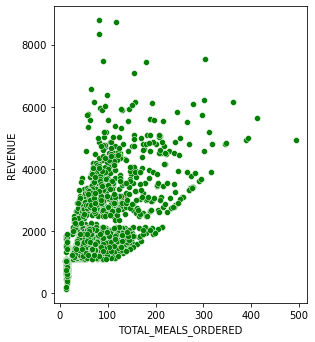

In [14]:
###################################################

# Visualizing All Continuous Variables as Scatterplots

###################################################
# setting figure size
fig, ax = plt.subplots(figsize = (10, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(x = chef['TOTAL_MEALS_ORDERED'],
                y = chef['REVENUE'],
                color = 'g')

plt.xlabel(xlabel = 'TOTAL_MEALS_ORDERED')
plt.ylabel(ylabel = 'REVENUE')

Scatterplots helped to decide between which continuous variables needed engineering 

In [15]:
# counting the number of zeroes for variables to determine engineering
tot_meals_zeroes     = len(chef['TOTAL_MEALS_ORDERED'][chef['TOTAL_MEALS_ORDERED'] == 0])
avg_site_zeroes      = len(chef['AVG_TIME_PER_SITE_VISIT'][chef['AVG_TIME_PER_SITE_VISIT'] == 0])
avg_prep_zeroes      = len(chef['AVG_PREP_VID_TIME'][chef['AVG_PREP_VID_TIME'] == 0])
tot_photos_zeroes    = len(chef['TOTAL_PHOTOS_VIEWED'][chef['TOTAL_PHOTOS_VIEWED'] == 0])
master_class_z       = len(chef['MASTER_CLASSES_ATTENDED'][chef['MASTER_CLASSES_ATTENDED'] == 0])
mobile_z             = len(chef['MOBILE_LOGINS'][chef['MOBILE_LOGINS'] == 0])
pc_z                 = len(chef['PC_LOGINS'][chef['PC_LOGINS'] == 0])
weekly_plan_z        = len(chef['WEEKLY_PLAN'][chef['WEEKLY_PLAN'] == 0])
early_z              = len(chef['EARLY_DELIVERIES'][chef['EARLY_DELIVERIES'] == 0])
late_z               = len(chef['LATE_DELIVERIES'][chef['LATE_DELIVERIES'] == 0])
tot_cancel_bn        = len(chef['CANCELLATIONS_BEFORE_NOON'][chef['CANCELLATIONS_BEFORE_NOON'] == 0])
tot_cancel_an        = len(chef['CANCELLATIONS_AFTER_NOON'][chef['CANCELLATIONS_AFTER_NOON'] == 0])



# printing a table of the results
print(f"""
                     No\t\tYes
               ---------------------
Total_Meals       | {tot_meals_zeroes}\t\t{len(chef) - tot_meals_zeroes}
Site Visit Time   | {avg_site_zeroes}\t\t{len(chef) - avg_site_zeroes}
Vid Time          | {avg_prep_zeroes}\t\t{len(chef) - avg_prep_zeroes}
Photos Viewed     | {tot_photos_zeroes}\t\t{len(chef) - tot_photos_zeroes}
Master Class      | {master_class_z}\t\t{len(chef) - master_class_z}
Mobile Logins     | {mobile_z}\t\t{len(chef) - mobile_z}
PC Logins         | {pc_z}\t\t{len(chef) - pc_z}
Weekly Plan       | {weekly_plan_z}\t\t{len(chef) - weekly_plan_z}
Early             | {early_z}\t\t{len(chef) - early_z}
Late              | {late_z}\t\t{len(chef) - late_z}
Cancel BN         | {tot_cancel_bn}\t\t{len(chef) - tot_cancel_bn}
Cancel AN         | {tot_cancel_an}\t\t{len(chef) - tot_cancel_an}

""")


                     No		Yes
               ---------------------
Total_Meals       | 0		1946
Site Visit Time   | 0		1946
Vid Time          | 0		1946
Photos Viewed     | 1140		806
Master Class      | 932		1014
Mobile Logins     | 16		1930
PC Logins         | 0		1946
Weekly Plan       | 468		1478
Early             | 1167		779
Late              | 319		1627
Cancel BN         | 667		1279
Cancel AN         | 1667		279




In [16]:
# dummy variable for following variables
chef['has_PHOTOS_VIEWED']            = 0
chef['has_MASTER_CLASSES_ATTENDED']  = 0
chef['has_MOBILE_LOGINS']            = 0
chef['has_WEEKLY_PLAN']              = 0
chef['has_EARLY_DELIVERIES']         = 0
chef['has_LATE_DELIVERIES']          = 0
chef['has_CANCELLATIONS_BEFORE_NOON']= 0
chef['has_CANCELLATIONS_AFTER_NOON'] = 0


# iterating over each original column to
# change values in the new feature columns
for index, value in chef.iterrows():
    
    #if statements for all engineered values
    if chef.loc[index, 'TOTAL_PHOTOS_VIEWED'] > 0:
        chef.loc[index, 'has_PHOTOS_VIEWED'] = 1
        
    if chef.loc[index, 'MASTER_CLASSES_ATTENDED'] > 0:
        chef.loc[index, 'has_MASTER_CLASSES_ATTENDED'] = 1
        
    if chef.loc[index, 'MOBILE_LOGINS'] > 0:
        chef.loc[index, 'has_MOBILE_LOGINS'] = 1
    
    if chef.loc[index, 'WEEKLY_PLAN'] > 0:
        chef.loc[index, 'has_WEEKLY_PLAN'] = 1
    
    if chef.loc[index, 'EARLY_DELIVERIES'] > 0:
        chef.loc[index, 'has_EARLY_DELIVERIES'] = 1
    
    if chef.loc[index, 'LATE_DELIVERIES'] > 0:
        chef.loc[index, 'has_LATE_DELIVERIES'] = 1
    
    if chef.loc[index, 'CANCELLATIONS_BEFORE_NOON'] > 0:
        chef.loc[index, 'has_CANCELLATIONS_BEFORE_NOON'] = 1
    
    if chef.loc[index, 'CANCELLATIONS_AFTER_NOON'] > 0:
        chef.loc[index, 'has_CANCELLATIONS_AFTER_NOON'] = 1

# check output
chef[['has_PHOTOS_VIEWED', 'has_MASTER_CLASSES_ATTENDED','has_MOBILE_LOGINS',
         'has_WEEKLY_PLAN', 'has_EARLY_DELIVERIES', 'has_LATE_DELIVERIES', 
         'has_CANCELLATIONS_BEFORE_NOON', 'has_CANCELLATIONS_AFTER_NOON']].head()

,has_PHOTOS_VIEWED,has_MASTER_CLASSES_ATTENDED,has_MOBILE_LOGINS,has_WEEKLY_PLAN,has_EARLY_DELIVERIES,has_LATE_DELIVERIES,has_CANCELLATIONS_BEFORE_NOON,has_CANCELLATIONS_AFTER_NOON
0,0,0,1,0,0,1,1,1
1,1,0,1,1,0,1,0,0
2,0,0,1,1,0,1,1,0
3,0,0,1,1,0,1,1,0
4,1,1,1,1,0,1,0,0


In [17]:
# developing correlation variable
zeroes_corr = chef.corr()    

# checking the correlations of the newly-created variables and revenue
zeroes_corr.loc['REVENUE', # Y-variable
               ['has_PHOTOS_VIEWED', 'has_MASTER_CLASSES_ATTENDED','has_MOBILE_LOGINS',
                'has_WEEKLY_PLAN', 'has_EARLY_DELIVERIES', 'has_LATE_DELIVERIES', 
                'has_CANCELLATIONS_BEFORE_NOON', 'has_CANCELLATIONS_AFTER_NOON']] \
                .sort_values(ascending = False)

has_MASTER_CLASSES_ATTENDED      0.453022
has_PHOTOS_VIEWED                0.372072
has_CANCELLATIONS_BEFORE_NOON    0.024267
has_EARLY_DELIVERIES             0.013471
has_MOBILE_LOGINS                0.007069
has_LATE_DELIVERIES             -0.017615
has_WEEKLY_PLAN                 -0.032196
has_CANCELLATIONS_AFTER_NOON    -0.040339
Name: REVENUE, dtype: float64

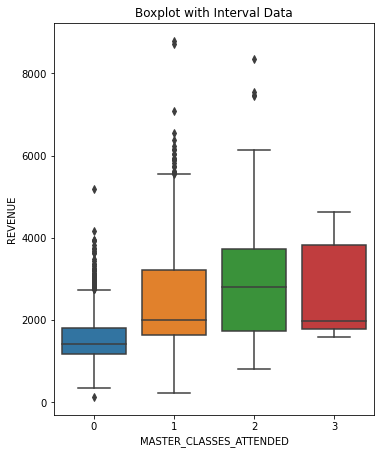

In [18]:
############################

#Using Box plots for Interval and Count Data
#Determining which interval/count data to transform

############################
fig, ax = plt.subplots(figsize = (10, 12))

plt.subplot(2, 2, 1)
sns.boxplot(x    = 'MASTER_CLASSES_ATTENDED',
            y    = 'REVENUE',
            data = chef)

plt.title(label   = 'Boxplot with Interval Data')
plt.xlabel(xlabel = 'MASTER_CLASSES_ATTENDED')
plt.ylabel(ylabel = 'REVENUE')

plt.tight_layout()
plt.show()

In [19]:
####################################################

#Feature Engineering of the Interval/Count Variables

####################################################

 #Log transformations of count/interval variables
chef['log_UNIQUE_MEALS_PURCH']          = np.log10(chef['UNIQUE_MEALS_PURCH'])
chef['log_CONTACTS_W_CUSTOMER_SERVICE'] = np.log10(chef['CONTACTS_W_CUSTOMER_SERVICE'])
chef['log_PRODUCT_CATEGORIES_VIEWED']   = np.log10(chef['PRODUCT_CATEGORIES_VIEWED'])
chef['log_PC_LOGINS']                   = np.log10(chef['PC_LOGINS'])
chef['log_MEDIAN_MEAL_RATING']          = np.log10(chef['MEDIAN_MEAL_RATING'])
chef['log_AVG_CLICKS_PER_VISIT']        = np.log10(chef['AVG_CLICKS_PER_VISIT'])
chef['log_AVG_MEALS_ORD']               = np.log10(chef['AVG_MEALS_ORD'])
chef['log_TOTAL_MEALS_ORDERED']         = np.log10(chef['TOTAL_MEALS_ORDERED'])

log_corr = chef.loc[ : , ['UNIQUE_MEALS_PURCH','log_UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE',
                          'log_CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED',
                          'log_PRODUCT_CATEGORIES_VIEWED','PC_LOGINS','log_PC_LOGINS',
                          'MEDIAN_MEAL_RATING','log_MEDIAN_MEAL_RATING',
                          'AVG_CLICKS_PER_VISIT','log_AVG_CLICKS_PER_VISIT',
                          'AVG_MEALS_ORD','log_AVG_MEALS_ORD','REVENUE',
                          'log_REVENUE', 'log_TOTAL_MEALS_ORDERED','TOTAL_MEALS_ORDERED' ]  ].corr(method = 'pearson')\
                          .round(decimals = 2)


#used to determine which variable has the highest correlation with revenue and log_revenue
log_corr.loc[ ['MEDIAN_MEAL_RATING','log_MEDIAN_MEAL_RATING'],
              ['REVENUE', 'log_REVENUE']   ]

,REVENUE,log_REVENUE
MEDIAN_MEAL_RATING,0.61,0.65
log_MEDIAN_MEAL_RATING,0.55,0.61


Median meal rating and the log value seems to have highest correlation

In [20]:
#to ensure that there are no zeros or negative numbers before log transform
chef['UNIQUE_MEALS_PURCH'].value_counts(normalize= False).sort_index()

1     173
2     170
3     338
4     260
5     214
6     226
7     205
8     179
9     162
10      7
11      3
12      4
13      3
18      1
19      1
Name: UNIQUE_MEALS_PURCH, dtype: int64

In [21]:
#Looking at the comparison of total logins and revenue
# total logins
chef['TOTAL_LOGINS'] = chef['MOBILE_LOGINS'] + (chef['PC_LOGINS'])

# developing a correlation matrix
login_corr = chef.loc[ : , ['MOBILE_LOGINS',
                              'PC_LOGINS',
                              'TOTAL_LOGINS',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)

# printing value counts and correlations
print(f"""
LOGINS
=========

-----------
Total Logins
-----------
{chef['TOTAL_LOGINS'].value_counts(normalize = False).sort_index()}


---------------------
Login Correlations
---------------------
{login_corr['REVENUE']}

""")


LOGINS

-----------
Total Logins
-----------
5     31
6    493
7    906
8    492
9     24
Name: TOTAL_LOGINS, dtype: int64


---------------------
Login Correlations
---------------------
MOBILE_LOGINS   -0.02
PC_LOGINS        0.02
TOTAL_LOGINS    -0.00
REVENUE          1.00
Name: REVENUE, dtype: float64




In [22]:
#Looking at the comparison of total cancellations and revenue
# total deliveries
chef['TOTAL_CANCELS'] = chef['CANCELLATIONS_AFTER_NOON'] + (chef['CANCELLATIONS_BEFORE_NOON'])

# developing a correlation matrix
cancel_corr = chef.loc[ : , ['CANCELLATIONS_AFTER_NOON',
                              'CANCELLATIONS_BEFORE_NOON',
                              'TOTAL_CANCELS',
                              'REVENUE']  ].corr(method = 'pearson')\
                                              .round(decimals = 2)


# printing value counts and correlations bathrooms
print(f"""
---------------------
Cancellation Correlations
---------------------
{cancel_corr['REVENUE']}

""")


---------------------
Cancellation Correlations
---------------------
CANCELLATIONS_AFTER_NOON    -0.04
CANCELLATIONS_BEFORE_NOON    0.01
TOTAL_CANCELS                0.00
REVENUE                      1.00
Name: REVENUE, dtype: float64




In [23]:
#checking if all columns are in the dataframe
chef.columns

Index(['REVENUE', 'CROSS_SELL_SUCCESS', 'NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH', 'CONTACTS_W_CUSTOMER_SERVICE', 'PRODUCT_CATEGORIES_VIEWED', 'AVG_TIME_PER_SITE_VISIT', 'MOBILE_NUMBER', 'CANCELLATIONS_BEFORE_NOON', 'CANCELLATIONS_AFTER_NOON', 'TASTES_AND_PREFERENCES', 'PC_LOGINS', 'MOBILE_LOGINS', 'WEEKLY_PLAN', 'EARLY_DELIVERIES', 'LATE_DELIVERIES', 'PACKAGE_LOCKER', 'REFRIGERATED_LOCKER', 'AVG_PREP_VID_TIME', 'AVG_MEALS_ORD', 'MASTER_CLASSES_ATTENDED', 'MEDIAN_MEAL_RATING', 'AVG_CLICKS_PER_VISIT', 'TOTAL_PHOTOS_VIEWED', 'CLEAN_MAIL', 'personal', 'work', 'log_REVENUE', 'has_PHOTOS_VIEWED', 'has_MASTER_CLASSES_ATTENDED', 'has_MOBILE_LOGINS', 'has_WEEKLY_PLAN', 'has_EARLY_DELIVERIES', 'has_LATE_DELIVERIES', 'has_CANCELLATIONS_BEFORE_NOON', 'has_CANCELLATIONS_AFTER_NOON', 'log_UNIQUE_MEALS_PURCH', 'log_CONTACTS_W_CUSTOMER_SERVICE', 'log_PRODUCT_CATEGORIES_VIEWED', 'log_PC_LOGINS', 'log_MEDIAN_MEAL_RATING', 'log_AVG_CLICKS_PER_VISIT',
     

In [24]:
### Analyzing Pearson Correlations of the X-variables with the Y-variable 

# creating a (Pearson) correlation matrix
df_corr = chef.corr().round(2)


# printing (Pearson) correlations with Revenue
print(df_corr.loc['REVENUE'].sort_values(ascending = False))

REVENUE                            1.00
log_REVENUE                        0.95
AVG_PREP_VID_TIME                  0.64
log_TOTAL_MEALS_ORDERED            0.61
MEDIAN_MEAL_RATING                 0.61
TOTAL_MEALS_ORDERED                0.60
log_MEDIAN_MEAL_RATING             0.55
TOTAL_PHOTOS_VIEWED                0.47
has_MASTER_CLASSES_ATTENDED        0.45
MASTER_CLASSES_ATTENDED            0.45
AVG_MEALS_ORD                      0.44
log_AVG_MEALS_ORD                  0.42
has_PHOTOS_VIEWED                  0.37
log_CONTACTS_W_CUSTOMER_SERVICE    0.17
AVG_TIME_PER_SITE_VISIT            0.14
CONTACTS_W_CUSTOMER_SERVICE        0.10
MOBILE_NUMBER                      0.03
PRODUCT_CATEGORIES_VIEWED          0.03
has_CANCELLATIONS_BEFORE_NOON      0.02
PC_LOGINS                          0.02
log_PRODUCT_CATEGORIES_VIEWED      0.01
CANCELLATIONS_BEFORE_NOON          0.01
log_PC_LOGINS                      0.01
has_MOBILE_LOGINS                  0.01
WEEKLY_PLAN                        0.01


In [25]:
############################################

#Building Full Model to Compare how Explanatory Variables Fare

############################################

# making a copy of chef
chef_explanatory = chef.copy()


# dropping SalePrice and Order from the explanatory variable set
chef_explanatory = chef_explanatory.drop(['REVENUE','log_REVENUE',
                                          #following columns removed due to no use or
                                          #redundancy (ie: email categories and all email names)
                                          'NAME','EMAIL','FIRST_NAME','FAMILY_NAME', 'CLEAN_MAIL'
                                         ], axis = 1)


# formatting each explanatory variable for statsmodels
for val in chef_explanatory:
    print(val,'+')


CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_TIME_PER_SITE_VISIT +
MOBILE_NUMBER +
CANCELLATIONS_BEFORE_NOON +
CANCELLATIONS_AFTER_NOON +
TASTES_AND_PREFERENCES +
PC_LOGINS +
MOBILE_LOGINS +
WEEKLY_PLAN +
EARLY_DELIVERIES +
LATE_DELIVERIES +
PACKAGE_LOCKER +
REFRIGERATED_LOCKER +
AVG_PREP_VID_TIME +
AVG_MEALS_ORD +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
AVG_CLICKS_PER_VISIT +
TOTAL_PHOTOS_VIEWED +
personal +
work +
has_PHOTOS_VIEWED +
has_MASTER_CLASSES_ATTENDED +
has_MOBILE_LOGINS +
has_WEEKLY_PLAN +
has_EARLY_DELIVERIES +
has_LATE_DELIVERIES +
has_CANCELLATIONS_BEFORE_NOON +
has_CANCELLATIONS_AFTER_NOON +
log_UNIQUE_MEALS_PURCH +
log_CONTACTS_W_CUSTOMER_SERVICE +
log_PRODUCT_CATEGORIES_VIEWED +
log_PC_LOGINS +
log_MEDIAN_MEAL_RATING +
log_AVG_CLICKS_PER_VISIT +
log_AVG_MEALS_ORD +
log_TOTAL_MEALS_ORDERED +
TOTAL_LOGINS +
TOTAL_CANCELS +


In [26]:
# saving feature-rich Chef dataset in excel
chef.to_excel('Chef_Ft_Rich.xlsx',index = False)

In [27]:
# building a model of OLS Regression
# there are deleted variables to maintain the R2 value at 0.766

#building a full model
lm_full = smf.ols(formula = """log_REVENUE ~ CROSS_SELL_SUCCESS +
                                TOTAL_MEALS_ORDERED +
                                UNIQUE_MEALS_PURCH +
                                CONTACTS_W_CUSTOMER_SERVICE +
                                PRODUCT_CATEGORIES_VIEWED +
                                AVG_PREP_VID_TIME +
                                MASTER_CLASSES_ATTENDED +
                                MEDIAN_MEAL_RATING +
                                TOTAL_PHOTOS_VIEWED +
                                personal +
                                work +
                                log_UNIQUE_MEALS_PURCH +
                                log_PRODUCT_CATEGORIES_VIEWED +
                                log_MEDIAN_MEAL_RATING +
                                has_WEEKLY_PLAN +
                                log_TOTAL_MEALS_ORDERED """,
                               data = chef)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            log_REVENUE   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     422.1
Date:                Mon, 18 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:53:05   Log-Likelihood:                 1674.4
No. Observations:                1946   AIC:                            -3317.
Df Residuals:                    1930   BIC:                            -3228.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.4521      0.024     59.983      0.000       1.405       1.500
CROSS_SELL_SUCCESS               -0.0125      0.005     -2.453      0.014      -0.022      -0.002
TOTAL_MEALS_ORDERED              -0.0011      0.000     -9.901      0.000      -0.001      -0.001
UNIQUE_MEALS_PURCH                0.0541      0.003     18.698      0.000       0.048       0.060
CONTACTS_W_CUSTOMER_SERVICE       0.0128      0.001      9.645      0.000       0.010       0.015
PRODUCT_CATEGORIES_VIEWED         0.0101      0.003      3.811      0.000       0.005       0.015
AVG_PREP_VID_TIME                 0.0011   6.39e-05     16.675      0.000       0.001       0.001
MASTER_CLASSES_ATTENDED           0.0298      0.004      7.017      0.000       0.021       0.038
MEDIAN_MEAL_RATING                0.1285      0.015      8.784      0.000       0.100       0.157
TOTAL_PHOTOS_VIEWED            9.814e-05   1.48e-05      6.624      0.000    6.91e-05       0.000
personal                          0.7268      0.012     59.422      0.000       0.703       0.751
work                              0.7253      0.012     58.224      0.000       0.701       0.750
log_UNIQUE_MEALS_PURCH           -0.6279      0.026    -23.809      0.000      -0.680      -0.576
log_PRODUCT_CATEGORIES_VIEWED    -0.0933      0.026     -3.527      0.000      -0.145      -0.041
log_MEDIAN_MEAL_RATING           -0.3539      0.077     -4.577      0.000      -0.506      -0.202
has_WEEKLY_PLAN                  -0.0117      0.005     -2.139      0.033      -0.022      -0.001
log_TOTAL_MEALS_ORDERED           0.4727      0.022     21.320      0.000       0.429       0.516
==============================================================================
Omnibus:                      478.406   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3472.324
Skew:                          -0.957   Prob(JB):                         0.00
Kurtosis:                       9.258   Cond. No.                     1.07e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Using log_REVENUE yields higher values of R2, these variables will then be used in SciKit in order to determine which model will be the best model to choose.
Here the R2 value is 0.766 utilizing the following variables in the code above.

In [28]:
#######################

#Building Training and Testing Data Sets
#Using New Feature Rich Dataset

#######################

# importing libraries
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
import statsmodels.formula.api as smf  
import sklearn.linear_model  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import StandardScaler 

# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying the path and file name
file = './Chef_Ft_Rich.xlsx'

# reading the file into Python
chefft = pd.read_excel(file)

chef.head(n=5)

,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,MOBILE_NUMBER,CANCELLATIONS_BEFORE_NOON,CANCELLATIONS_AFTER_NOON,TASTES_AND_PREFERENCES,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,EARLY_DELIVERIES,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,AVG_PREP_VID_TIME,AVG_MEALS_ORD,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED,CLEAN_MAIL,personal,work,log_REVENUE,has_PHOTOS_VIEWED,has_MASTER_CLASSES_ATTENDED,has_MOBILE_LOGINS,has_WEEKLY_PLAN,has_EARLY_DELIVERIES,has_LATE_DELIVERIES,has_CANCELLATIONS_BEFORE_NOON,has_CANCELLATIONS_AFTER_NOON,log_UNIQUE_MEALS_PURCH,log_CONTACTS_W_CUSTOMER_SERVICE,log_PRODUCT_CATEGORIES_VIEWED,log_PC_LOGINS,log_MEDIAN_MEAL_RATING,log_AVG_CLICKS_PER_VISIT,log_AVG_MEALS_ORD,log_TOTAL_MEALS_ORDERED,TOTAL_LOGINS,TOTAL_CANCELS
0,393.0,1,Saathos,saathos@unitedhealth.com,Saathos,Saathos,14,6,12,10,48.00,1,3,1,1,5,2,0,0,2,0,0,33.4,1,0,1,17,0,unitedhealth,0,1,2.594393,0,0,1,0,0,1,1,1,0.778151,1.079181,1.00000,0.698970,0.000000,1.230449,0.0,1.146128,7,4
1,1365.0,1,Alysanne Osgrey,alysanne.osgrey@ge.org,Alysanne,Osgrey,87,3,8,8,40.35,1,0,0,1,5,1,12,0,2,0,0,84.8,1,0,3,13,170,ge,0,1,3.135133,1,0,1,1,0,1,0,0,0.477121,0.903090,0.90309,0.698970,0.477121,1.113943,0.0,1.939519,6,0
2,800.0,1,Edwyd Fossoway,edwyd.fossoway@jnj.com,Edwyd,Fossoway,15,7,11,5,19.77,1,3,0,1,6,1,1,0,1,0,0,63.0,1,0,2,16,0,jnj,0,1,2.903090,0,0,1,1,0,1,1,0,0.845098,1.041393,0.69897,0.778151,0.301030,1.204120,0.0,1.176091,7,3
3,600.0,1,Eleyna Westerling,eleyna.westerling@ge.org,Eleyna,Westerling,13,6,11,5,90.00,1,2,0,1,6,1,14,0,3,0,0,43.8,1,0,2,14,0,ge,0,1,2.778151,0,0,1,1,0,1,1,0,0.778151,1.041393,0.69897,0.778151,0.301030,1.146128,0.0,1.113943,7,2
4,1490.0,1,Elyn Norridge,elyn.norridge@jnj.com,Elyn,Norridge,47,8,6,10,40.38,1,0,0,0,5,1,5,0,8,0,0,84.8,1,1,3,12,205,jnj,0,1,3.173186,1,1,1,1,0,1,0,0,0.903090,0.778151,1.00000,0.698970,0.477121,1.079181,0.0,1.672098,6,0


In [29]:
# preparing explanatory variable data
chefft_data  = chefft.drop(['REVENUE','log_REVENUE',
                            'NAME', 'EMAIL','FIRST_NAME',
                            'CLEAN_MAIL',
                            'FAMILY_NAME'],
                                axis = 1)


# preparing response variable data
# depending on what one we want to use
chefft_target = chefft.loc[ : , 'REVENUE']
log_chefft_target = chefft.loc[ : , 'log_REVENUE'] 


# preparing training and testing sets (all letters are lowercase)
# using the log revenue as our target instead

x_train, x_test, y_train, y_test = train_test_split(
            chefft_data,
            log_chefft_target,
            test_size    = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1459, 43)
y-side: (1459,)


Testing Data
------------
X-side: (487, 43)
y-side: (487,)



In [30]:
# declaring set of x-variables
x_variables = ['CROSS_SELL_SUCCESS','TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH',
               'CONTACTS_W_CUSTOMER_SERVICE','PRODUCT_CATEGORIES_VIEWED',
               'AVG_PREP_VID_TIME','MASTER_CLASSES_ATTENDED','MEDIAN_MEAL_RATING',
               'TOTAL_PHOTOS_VIEWED','log_UNIQUE_MEALS_PURCH',
               'log_PRODUCT_CATEGORIES_VIEWED','log_MEDIAN_MEAL_RATING',
               'personal', 'work','has_WEEKLY_PLAN','log_TOTAL_MEALS_ORDERED']


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

CROSS_SELL_SUCCESS +
TOTAL_MEALS_ORDERED +
UNIQUE_MEALS_PURCH +
CONTACTS_W_CUSTOMER_SERVICE +
PRODUCT_CATEGORIES_VIEWED +
AVG_PREP_VID_TIME +
MASTER_CLASSES_ATTENDED +
MEDIAN_MEAL_RATING +
TOTAL_PHOTOS_VIEWED +
log_UNIQUE_MEALS_PURCH +
log_PRODUCT_CATEGORIES_VIEWED +
log_MEDIAN_MEAL_RATING +
personal +
work +
has_WEEKLY_PLAN +
log_TOTAL_MEALS_ORDERED +


In [31]:
# applying OLS model in scikit-learn

# preparing x-variables from the OLS model
ols_data = chefft[x_variables]

# preparing response variable
log_chefft_target = chefft['log_REVENUE']


###############################################
## setting up more than one train-test split ##
###############################################

# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            chefft_data,     # x-variables
            log_chefft_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            log_chefft_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


In [32]:
###############################################
##        OLS MODEL WITH FULL DATA           ##
###############################################

# INSTANTIATING a model object
lr = LinearRegression()


# Fit to training data
lr_fit = lr.fit(x_train_FULL, y_train_FULL)

#predicting new data
lr_pred = lr_fit.predict(x_test_FULL)


#Results print out
print('OLS Training Score :', lr.score(x_train_FULL, y_train_FULL).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_FULL, y_test_FULL).round(4)) # using R-square

#creating values
lr_train_score = lr.score(x_train_FULL, y_train_FULL).round(4)
lr_test_score = lr.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.7762
OLS Testing Score  : 0.7708
OLS Train-Test Gap : 0.0054


In [33]:
###############################################
##         ARD MODEL WITH FULL DATA          ##
###############################################

# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression(normalize  = False)


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4)
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.729
Testing Score : 0.7194
ARD Train-Test Gap : 0.0096


In [34]:
###############################################
##    PARAMETER TUNING FOR LASSO AND KNN     ##
###############################################

#importing library for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# using hyperparameter tuning
param_grid = {'alpha': np.arange(0.1, 1.1, 0.1)}
lasso = sklearn.linear_model.Lasso()
lasso_cv = GridSearchCV(lasso, param_grid, cv = 10)
lasso_cv.fit(x_train, y_train)
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)


# using hyperparameter tuning
param_grid = {'n_neighbors': np.arange(1, 50),
              'algorithm': ['auto']}
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(x_train, y_train)
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'alpha': 0.4}
0.5196586727232437
{'algorithm': 'auto', 'n_neighbors': 16}
0.6017738081259895


In [35]:
###############################################
##       LASSO MODEL WITH FULL DATA          ##
###############################################

# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 0.4,    #default shrinkage
                                         normalize = False) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lasso_test_gap = abs(lr_train_score - lr_test_score).round(4)

Lasso Training Score : 0.5334
Lasso Testing Score  : 0.5705
Lasso Train-Test Gap : 0.0054


In [36]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(chefft_data)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(chefft_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.45,-1.15,-1.56,-2.62,-1.44,-1.43,-2.68,-0.91,-0.38,-1.58,-2.61,-2.80,-0.83,-0.64,-1.08,-0.74,-0.36,-2.37,-2.22,-0.94,-2.37,-3.65,-0.59,-1.25,-0.80,-0.84,-1.04,-10.98,-1.78,-0.82,-2.26,-1.38,-0.41,-2.27,-5.60,-2.09,-2.96,-3.08,-5.38,-3.88,-2.30,-2.53,-0.98
25%,-1.45,-0.64,-0.76,-0.87,-0.78,-0.44,0.37,-0.91,-0.38,-1.58,-0.89,-0.90,-0.76,-0.64,-0.72,-0.74,-0.36,-0.73,-0.93,-0.94,-1.05,-0.65,-0.59,-1.25,-0.80,-0.84,-1.04,0.09,0.56,-0.82,0.44,-1.38,-0.41,-0.52,-0.83,-0.53,-0.87,-0.91,-0.56,-0.89,-0.55,-1.26,-0.98
50%,0.69,-0.26,0.04,0.01,-0.13,-0.09,0.37,-0.26,-0.38,0.63,0.83,-0.90,-0.32,-0.64,-0.35,-0.74,-0.36,-0.10,-0.28,0.62,0.27,-0.22,-0.59,0.80,-0.80,-0.84,0.96,0.09,0.56,-0.82,0.44,0.72,-0.41,0.29,0.17,0.19,0.84,0.36,-0.12,-0.11,0.04,0.01,-0.35
75%,0.69,0.37,0.84,0.45,0.86,0.28,0.37,0.38,-0.38,0.63,0.83,0.99,0.12,0.65,0.38,1.35,-0.36,0.47,0.36,0.62,0.27,0.64,0.37,0.80,1.25,1.19,0.96,0.09,0.56,1.22,0.44,0.72,-0.41,0.83,0.57,0.86,0.84,0.36,0.66,0.50,0.67,1.28,0.27
max,0.69,7.57,5.63,4.83,1.52,24.81,0.37,7.48,6.56,0.63,2.56,2.89,3.00,3.24,5.84,1.35,2.80,8.37,4.24,3.73,2.92,2.35,8.25,0.80,1.25,1.19,0.96,0.09,0.56,1.22,0.44,0.72,2.44,2.42,2.97,1.18,2.29,1.96,1.96,2.64,2.94,2.55,7.10


In [37]:
# # preparing training and testing sets (all letters are lowercase)
# # using the log revenue as our target instead
x_train_STAND, x_test_STAND, y_train_STAND, y_test_STAND = train_test_split(
            x_scaled_df,
            log_chefft_target,
            test_size = 0.25,
            random_state = 219)

In [38]:
# INSTANTIATING a model with the optimal number of neighbors
knn_stand = KNeighborsRegressor(algorithm = 'auto',
                                n_neighbors = 16)



# FITTING the model based on the training data
knn_stand_fit = knn_stand.fit(x_train_STAND, y_train_STAND)



# PREDITCING on new data
knn_stand_pred = knn_stand_fit.predict(x_test_STAND)



# SCORING the results
print('KNN Training Score:', knn_stand.score(x_train_STAND, y_train_STAND).round(4))
print('KNN Testing Score :',  knn_stand.score(x_test_STAND, y_test_STAND).round(4))


# saving scoring data for future use
knn_stand_score_train = knn_stand.score(x_train_STAND, y_train_STAND).round(4)
knn_stand_score_test  = knn_stand.score(x_test_STAND, y_test_STAND).round(4)


# displaying and saving the gap between training and testing
print('KNN Train-Test Gap:', abs(knn_stand_score_train - knn_stand_score_test).round(4))
knn_stand_test_gap = abs(knn_stand_score_train - knn_stand_score_test).round(4)

KNN Training Score: 0.6974
KNN Testing Score : 0.6509
KNN Train-Test Gap: 0.0465


In [39]:
# comparing results of all models

print(f"""
Model           Train Score      Test Score
-----           -----------      ----------
\033[1mOLS                {lr_train_score}            {lr_test_score}\033[0m
Lasso              {lasso_train_score}            {lasso_test_score}
ARD                {ard_train_score}             {ard_test_score}
KNN-Standardized   {knn_stand_score_train}            {knn_stand_score_test}


Model           Train Test Gap      Model Size 
-----           --------------      ----------
\033[1mOLS                {lr_test_gap}               20\033[0m
Lasso              {lasso_test_gap}               42
ARD                {ard_test_gap}               42
KNN-Standardized   {knn_stand_test_gap}               NA

Model             Intercept      
-----           --------------      
\033[1mOLS                 2.2       \033[0m
Lasso               2.95              
ARD                 2.44               
KNN-Standardized     NA           


\033[1mTherefore; the best model is OLS based on R-squared value,\
 and is my chosen model.\033[0m
""")



Model           Train Score      Test Score
-----           -----------      ----------
OLS                0.7762            0.7708
Lasso              0.5334            0.5705
ARD                0.729             0.7194
KNN-Standardized   0.6974            0.6509


Model           Train Test Gap      Model Size 
-----           --------------      ----------
OLS                0.0054               20
Lasso              0.0054               42
ARD                0.0096               42
KNN-Standardized   0.0465               NA

Model             Intercept      
-----           --------------      
OLS                 2.2       
Lasso               2.95              
ARD                 2.44               
KNN-Standardized     NA           


Therefore; the best model is OLS based on R-squared value, and is my chosen model.

